In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import math
from quaternion import Quaternion

In [63]:
def scale_value(value, scale, x):
    return round((abs(value) / x) * scale) 

def scale_roll(roll, scale):
    return scale_value(roll, scale, 180)

def scale_pitch(pitch, scale):
    return scale_value(pitch, scale, 90)
   
stimuli = []   
 
scale_type = {
    "gesture_pitch_number": 100,
    "gesture_pitch_greyscale": 49,
    "gesture_roll_number": 100,
    "gesture_roll_greyscale": 49,
    "slider_number": 1,
    "slider_greyscale": 1,
}

euler_type = {
    "gesture_pitch_number": "XYZ",
    "gesture_pitch_greyscale": "XYZ",
    "gesture_roll_number": "XYZ",
    "gesture_roll_greyscale": "XYZ",
    "slider_number": "XYZ",
    "slider_greyscale": "XYZ",
}

with open('experiment_data/combined_participant_data.json', 'r') as file:
    data = json.load(file)

    if data:
        for participant in data:
            for experiment in participant["completedExperiments"]:
                experiment_type = experiment.get("experimentType")
                for stimulus in experiment["successfulStimuli"]:
                    sensor_reading = stimulus.get("sensorReading", {})
                    quaternion = Quaternion(
                        sensor_reading.get("w"),
                        sensor_reading.get("x"),
                        sensor_reading.get("y"),
                        sensor_reading.get("z")
                    )
                    if None not in quaternion:
                        yaw, pitch, roll = quaternion.euler_angles(euler_type[experiment_type])
                    
                        pitch_deg = math.degrees(pitch)
                        roll_deg = math.degrees(roll)
                        
                        sensor_reading["roll"] = roll_deg
                        sensor_reading["pitch"] = pitch_deg

                        pitch_scaled = scale_pitch(pitch_deg, scale_type[experiment_type])
                        roll_scaled = scale_roll(roll_deg, scale_type[experiment_type])
                        truth_value = stimulus.get("truth")

                        stimulus["pitch"] = pitch_deg
                        stimulus["pitch_truth"] = pitch_scaled
                        stimulus["pitch_truth_diff"] = abs(truth_value - pitch_scaled)
                        stimulus["roll"] = roll_deg
                        stimulus["roll_truth"] = roll_scaled
                        stimulus["roll_truth_diff"] = abs(truth_value - roll_scaled)
                        stimulus["experiment_type"] = experiment_type
                        
                        stimuli.append(stimulus)

df = pd.DataFrame(data=stimuli)

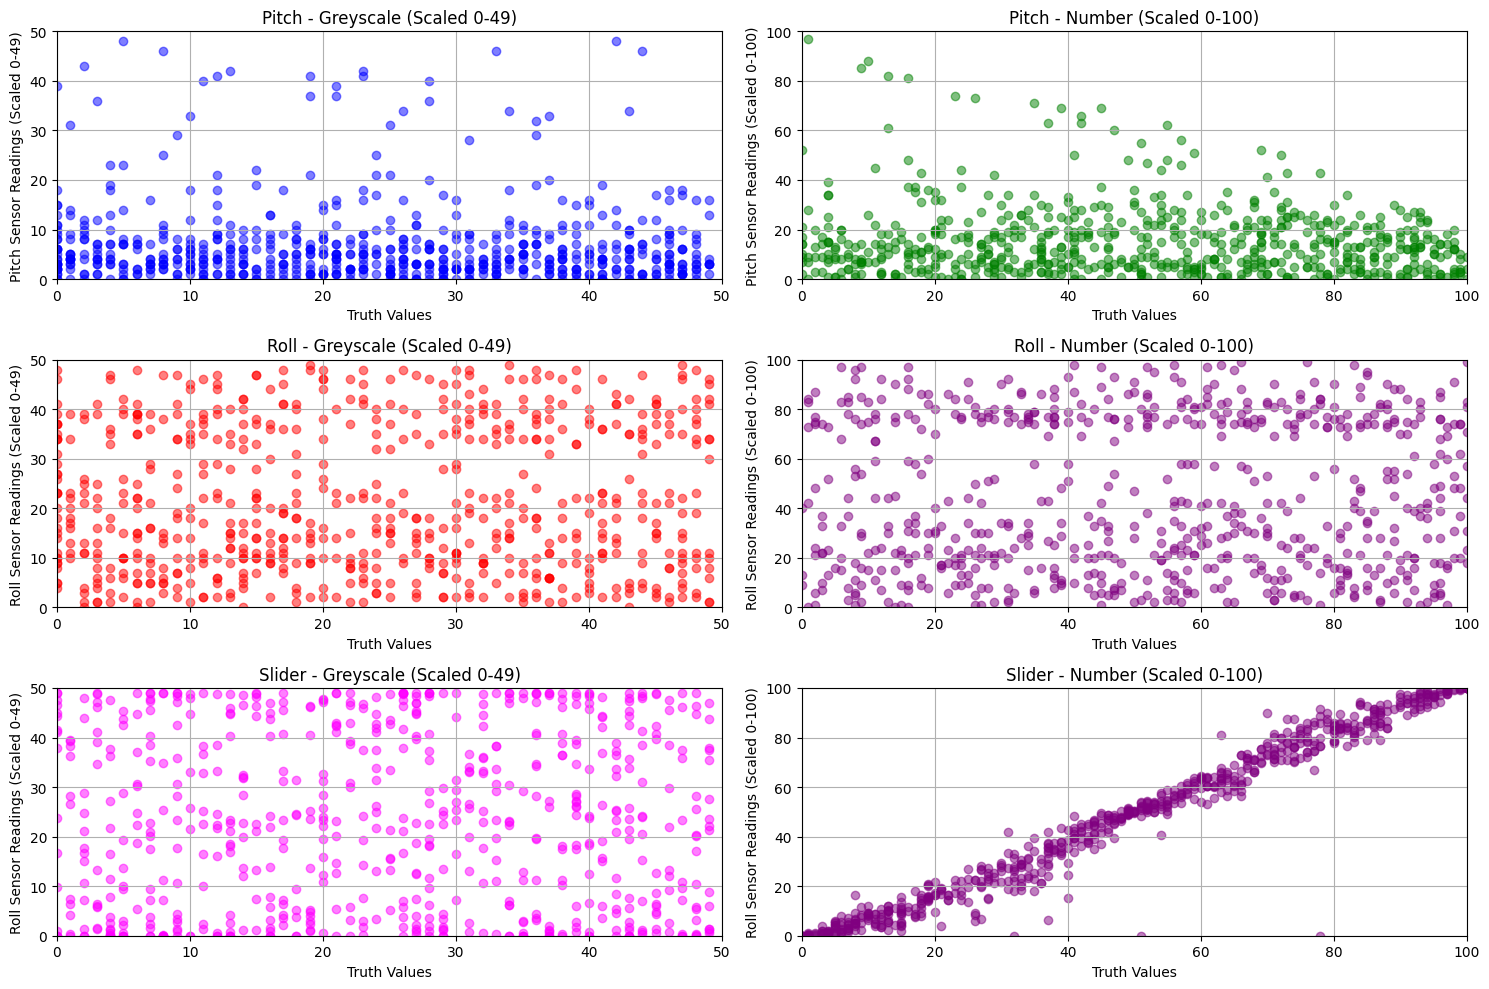

In [64]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

g_pitch_greyscale_df = df[df["experiment_type"] == "gesture_pitch_greyscale"]

axes[0, 0].scatter(g_pitch_greyscale_df["truth"], g_pitch_greyscale_df["pitch_truth"], c='blue', alpha=0.5)
axes[0, 0].set_title('Pitch - Greyscale (Scaled 0-49)')
axes[0, 0].set_xlabel('Truth Values')
axes[0, 0].set_ylabel('Pitch Sensor Readings (Scaled 0-49)')
axes[0, 0].grid(True)
axes[0, 0].set_xlim(0, 50)
axes[0, 0].set_ylim(0, 50)


g_pitch_number_df = df[df["experiment_type"] == "gesture_pitch_number"]

axes[0, 1].scatter(g_pitch_number_df["truth"], g_pitch_number_df["pitch_truth"], c='green', alpha=0.5)
axes[0, 1].set_title('Pitch - Number (Scaled 0-100)')
axes[0, 1].set_xlabel('Truth Values')
axes[0, 1].set_ylabel('Pitch Sensor Readings (Scaled 0-100)')
axes[0, 1].grid(True)
axes[0, 1].set_xlim(0, 100)
axes[0, 1].set_ylim(0, 100)

g_roll_greyscale_df = df[df["experiment_type"] == "gesture_roll_greyscale"]

axes[1, 0].scatter(g_roll_greyscale_df["truth"], g_roll_greyscale_df["roll_truth"], c='red', alpha=0.5)
axes[1, 0].set_title('Roll - Greyscale (Scaled 0-49)')
axes[1, 0].set_xlabel('Truth Values')
axes[1, 0].set_ylabel('Roll Sensor Readings (Scaled 0-49)')
axes[1, 0].grid(True)
axes[1, 0].set_xlim(0, 50)
axes[1, 0].set_ylim(0, 50)

g_roll_number_df = df[df["experiment_type"] == "gesture_roll_number"]

axes[1, 1].scatter(g_roll_number_df["truth"], g_roll_number_df["roll_truth"], c='purple', alpha=0.5)
axes[1, 1].set_title('Roll - Number (Scaled 0-100)')
axes[1, 1].set_xlabel('Truth Values')
axes[1, 1].set_ylabel('Roll Sensor Readings (Scaled 0-100)')
axes[1, 1].grid(True)
axes[1, 1].set_xlim(0, 100)
axes[1, 1].set_ylim(0, 100)

g_slider_greyscale_df = df[df["experiment_type"] == "slider_greyscale"]

axes[2, 0].scatter(g_slider_greyscale_df["truth"], g_slider_greyscale_df["value"], c='magenta', alpha=0.5)
axes[2, 0].set_title('Slider - Greyscale (Scaled 0-49)')
axes[2, 0].set_xlabel('Truth Values')
axes[2, 0].set_ylabel('Roll Sensor Readings (Scaled 0-49)')
axes[2, 0].grid(True)
axes[2, 0].set_xlim(0, 50)
axes[2, 0].set_ylim(0, 50)

g_slider_number_df = df[df["experiment_type"] == "slider_number"]

axes[2, 1].scatter(g_slider_number_df["truth"], g_slider_number_df["value"], c='purple', alpha=0.5)
axes[2, 1].set_title('Slider - Number (Scaled 0-100)')
axes[2, 1].set_xlabel('Truth Values')
axes[2, 1].set_ylabel('Roll Sensor Readings (Scaled 0-100)')
axes[2, 1].grid(True)
axes[2, 1].set_xlim(0, 100)
axes[2, 1].set_ylim(0, 100)

plt.tight_layout()
plt.show()

In [53]:
df[(df["experiment_type"] == "gesture_roll_number") & (df["truth"] == 100)]

,value,id,truth,inputType,sensorReading,pitch,pitch_truth,pitch_truth_diff,roll,roll_truth,roll_truth_diff,experiment_type
189,0.0,10,100,device,"{'timestamp': 1719228117, 'y': -0.672607, 'x':...",72.513020,81,19,78.496177,44,56,gesture_roll_number
1425,0.0,6,100,device,"{'stability': 'In motion', 'timestamp': 171931...",-59.601486,66,34,119.056073,66,34,gesture_roll_number
1532,0.0,13,100,device,"{'w': 0.208923, 'activity': 'Still', 'activity...",-56.688446,63,37,-104.456813,58,42,gesture_roll_number
1627,0.0,8,100,device,"{'activity': 'Still', 'stability': 'In motion'...",-36.953349,41,59,99.318782,55,45,gesture_roll_number
1892,0.0,13,100,device,"{'z': 0.718811, 'y': 0.268066, 'duration': 139...",46.291786,51,49,-77.314037,43,57,gesture_roll_number
2148,0.0,9,100,device,"{'z': 0.651733, 'activity': 'Still', 'timestam...",-30.629335,34,66,-84.582510,47,53,gesture_roll_number
2868,0.0,9,100,device,"{'w': 0.316528, 'activity': 'Still', 'stabilit...",30.528447,34,66,91.509370,51,49,gesture_roll_number
3067,0.0,8,100,device,"{'calibration_status': 1, 'activity': 'Still',...",-76.083559,85,15,106.776958,59,41,gesture_roll_number
3263,0.0,4,100,device,"{'activity_confidence': 73, 'calibration_statu...",7.430778,8,92,89.146281,50,50,gesture_roll_number


In [60]:
df[(df["experiment_type"] == "gesture_roll_number") & (df["roll_truth_diff"] < 30)]

,value,id,truth,inputType,sensorReading,pitch,pitch_truth,pitch_truth_diff,roll,roll_truth,roll_truth_diff,experiment_type
81,0.0,2,47,device,"{'duration': 168, 'w': 0.311829, 'x': -0.25341...",18.701987,21,26,-122.179050,68,21,gesture_roll_number
82,0.0,3,58,device,"{'w': 0.379944, 'stability': 'Stable', 'calibr...",23.462188,26,32,-117.096663,65,7,gesture_roll_number
83,0.0,4,67,device,"{'z': 0.385437, 'activity': 'Still', 'calibrat...",26.315169,29,38,-111.595107,62,5,gesture_roll_number
85,0.0,6,40,device,"{'w': 0.342834, 'x': -0.267334, 'calibration_s...",19.937583,22,18,-118.457040,66,26,gesture_roll_number
86,0.0,7,84,device,"{'duration': 131, 'y': 0.712585, 'z': 0.364746...",31.421895,35,49,-103.207456,57,27,gesture_roll_number
...,...,...,...,...,...,...,...,...,...,...,...,...
3881,0.0,2,8,device,"{'timestamp': 1719572200, 'w': -0.0335083, 'st...",-11.967041,13,5,-19.230443,11,3,gesture_roll_number
3882,0.0,3,18,device,"{'stability': 'Stable', 'duration': 174, 'cali...",-24.367648,27,9,-20.899716,12,6,gesture_roll_number
3896,0.0,17,44,device,"{'calibration_status': 1, 'timestamp': 1719572...",-37.530938,42,2,-26.525597,15,29,gesture_roll_number
3897,0.0,18,4,device,"{'y': 0.197266, 'activity_confidence': 88, 'ti...",-22.008769,24,20,-23.915183,13,9,gesture_roll_number
